In [1]:
%matplotlib notebook

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab
import statistics as st
from sklearn import linear_model, metrics
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
def estimateConfounderBiasLight(n, alpha, beta, gamma, Ux, Uy, Uz):
    
    Z = Uz
    X = gamma * Z + Ux
    Y = alpha * X + beta * Z + Uy
    
    VarZ = st.variance(Z)
    VarX = st.variance(X)
    VarY = st.variance(Y)
    CovXZ = CovZX = np.cov(Z,X)[0,1]
    CovZY = CovYZ = np.cov(Z,Y)[0,1]
    CovXY = CovYX = np.cov(Y,X)[0,1]
    
    confBias = (CovZX * (((CovYX/VarX)*CovXZ) - CovYZ)) / ((VarX * VarZ) - (CovXZ * CovXZ))
    return confBias

In [4]:
def generateConf4DPlotData(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    data = np.zeros((1,4))
    maxVal = -math.inf
    minVal = math.inf
    for alpha in np.arange(-1.0,1.01,0.2):
        for beta in np.arange(-1.0,1.01,0.2):
            for gamma in np.arange(-1.0,1.01,0.2):
                biasVal = estimateConfounderBiasLight(n,alpha,beta,gamma,Ux,Uy,Uz)
                data = np.vstack((data,np.array([alpha,beta,gamma,biasVal])))
                if biasVal > maxVal:
                    maxVal = biasVal
                    alphaMax = alpha
                    betaMax = beta
                    gammaMax = gamma
                if biasVal < minVal:
                    alphaMin = alpha
                    minVal = biasVal
                    betaMin = beta
                    gammaMin = gamma
    print('Max bias = ', maxVal, '(alpha=', alphaMax, 'beta=', betaMax, 'gamma=', gammaMax,')')
    print('Min bias = ', minVal, '(alpha=', alphaMin, 'beta=', betaMin, 'gamma=', gammaMin,')')
    return data

In [5]:
def plot4DPlot(data):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = data[:,2]
    y = data[:,1]
    z = data[:,0]
    c = data[:,3]

    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    #img = ax.scatter(x, y, z, c=c)
    
    ax.set_xlabel('gamma')
    ax.set_ylabel('beta')
    ax.set_zlabel('alpha')
    
    ax.view_init(25, 60)
    
    #label = pylab.annotate(
    #"Bias= , beta= , gamma= ", 
    #xy = (0.02, 0.06), xytext = (20, 20),
    #textcoords = 'offset points', ha = 'right', va = 'bottom',
    #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.colorbar(img)
    plt.show() 

Max bias =  0.5423044352520585 (alpha= -0.8 beta= 0.9999999999999996 gamma= -0.8 )
Min bias =  -0.5798305795774787 (alpha= -1.0 beta= 0.9999999999999996 gamma= 0.9999999999999996 )


<IPython.core.display.Javascript object>


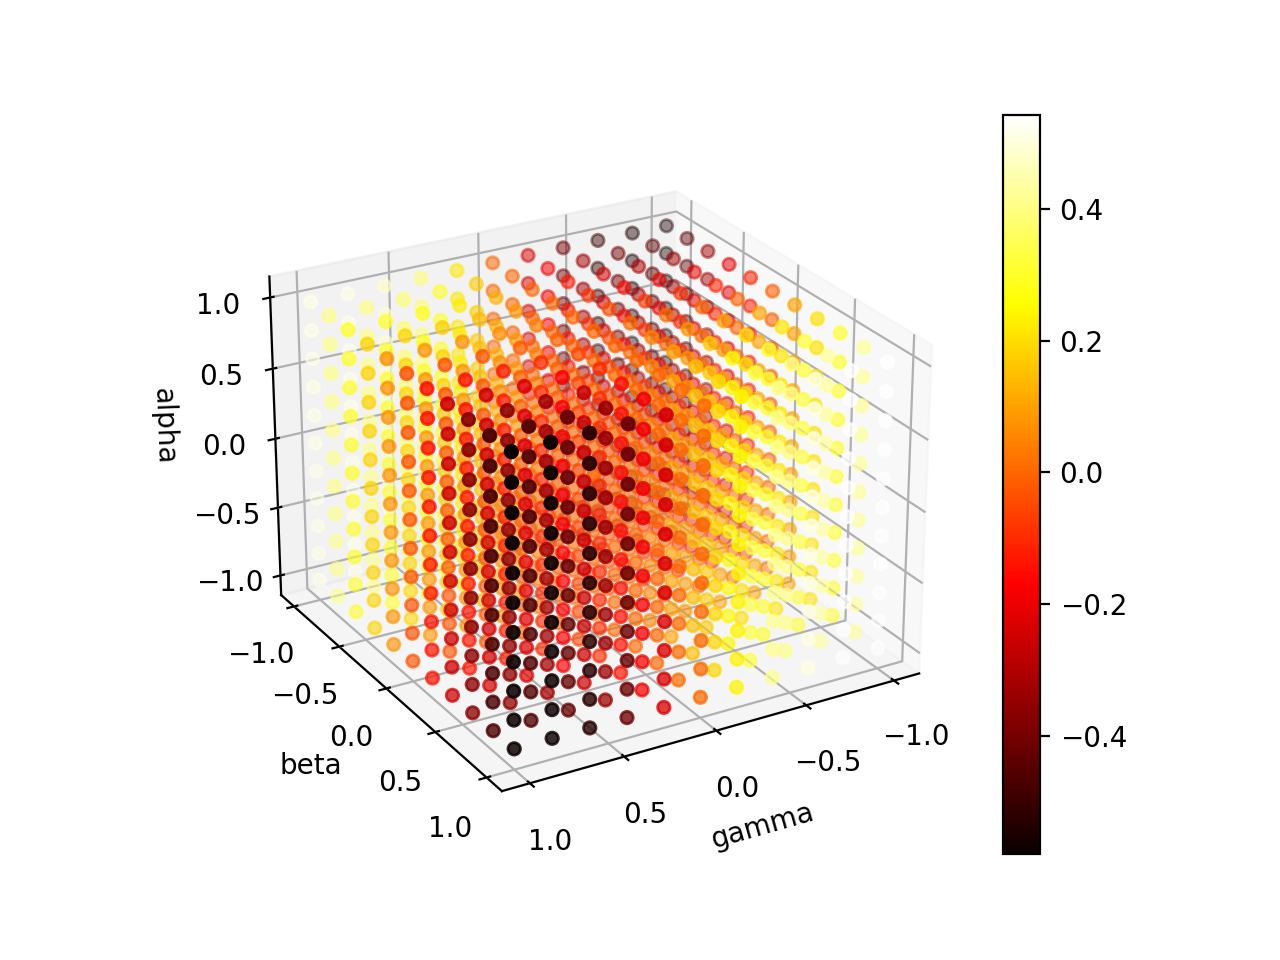

In [6]:
plot4DPlot(generateConf4DPlotData(100))

In [7]:
def generateConf3DPlotData(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    #data = np.zeros((1,3))
    betas = np.arange(-1.0,1.01,0.1)
    gammas = np.arange(-1.0,1.01,0.1)
    bs, gs = np.meshgrid(betas,gammas)
    bias = np.zeros((len(bs),len(gs)))
    maxVal = -math.inf
    minVal = math.inf
    for i in range(len(bs)):
        for j in range(len(gs)):
            bias[i][j] = estimateConfounderBiasLight(n,0.5,bs[i][j],gs[i][j],Ux,Uy,Uz)
            if bias[i][j] > maxVal:
                maxVal = bias[i][j]
                betaMax = bs[i][j]
                gammaMax = gs[i][j]
            if bias[i][j] < minVal:
                minVal = bias[i][j]
                betaMin = bs[i][j]
                gammaMin = gs[i][j]
    print('Max bias = ', maxVal, '(beta=', betaMax, 'gamma=', gammaMax,')')
    print('Min bias = ', minVal, '(beta=', betaMin, 'gamma=', gammaMin,')')
        
    return (bs, gs, bias, (maxVal,betaMax,gammaMax))

In [8]:
data = generateConf3DPlotData(10)

Max bias =  0.9082746322586804 (beta= 0.9999999999999996 gamma= -0.8 )
Min bias =  -0.39319344499796544 (beta= -1.0 gamma= 0.2999999999999998 )


In [9]:
X,Y,Z,maxBias = data

In [18]:
def plot3D(plotData):
    
    print('test')
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    X,Y,Z,maxBias = plotData

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.view_init(20, 45)
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$\gamma$')
    ax.set_zlabel('bias')
    #ax.set_title('test')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    bias,beta,gamma = maxBias
    
#     annotation = "Bias = " + str(bias) + ', beta=' + str(beta) + ', gamma=' + str(gamma)
#     print(annotation)
    
#     label = pylab.annotate(
#     "Max Bias =" + str(round(bias,2)) + ', beta=' + str(round(beta,2)) + ', gamma=' + str(round(gamma,2)), 
#     xy = (0.02, 0.06), xytext = (20, 20),
#     textcoords = 'offset points', ha = 'right', va = 'bottom',
#     bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
    #,
    #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    plt.show()

Max bias =  0.4833702826072834 (beta= -1.0 gamma= 0.9999999999999996 )
Min bias =  -0.514697721980074 (beta= -1.0 gamma= -1.0 )
test


<IPython.core.display.Javascript object>


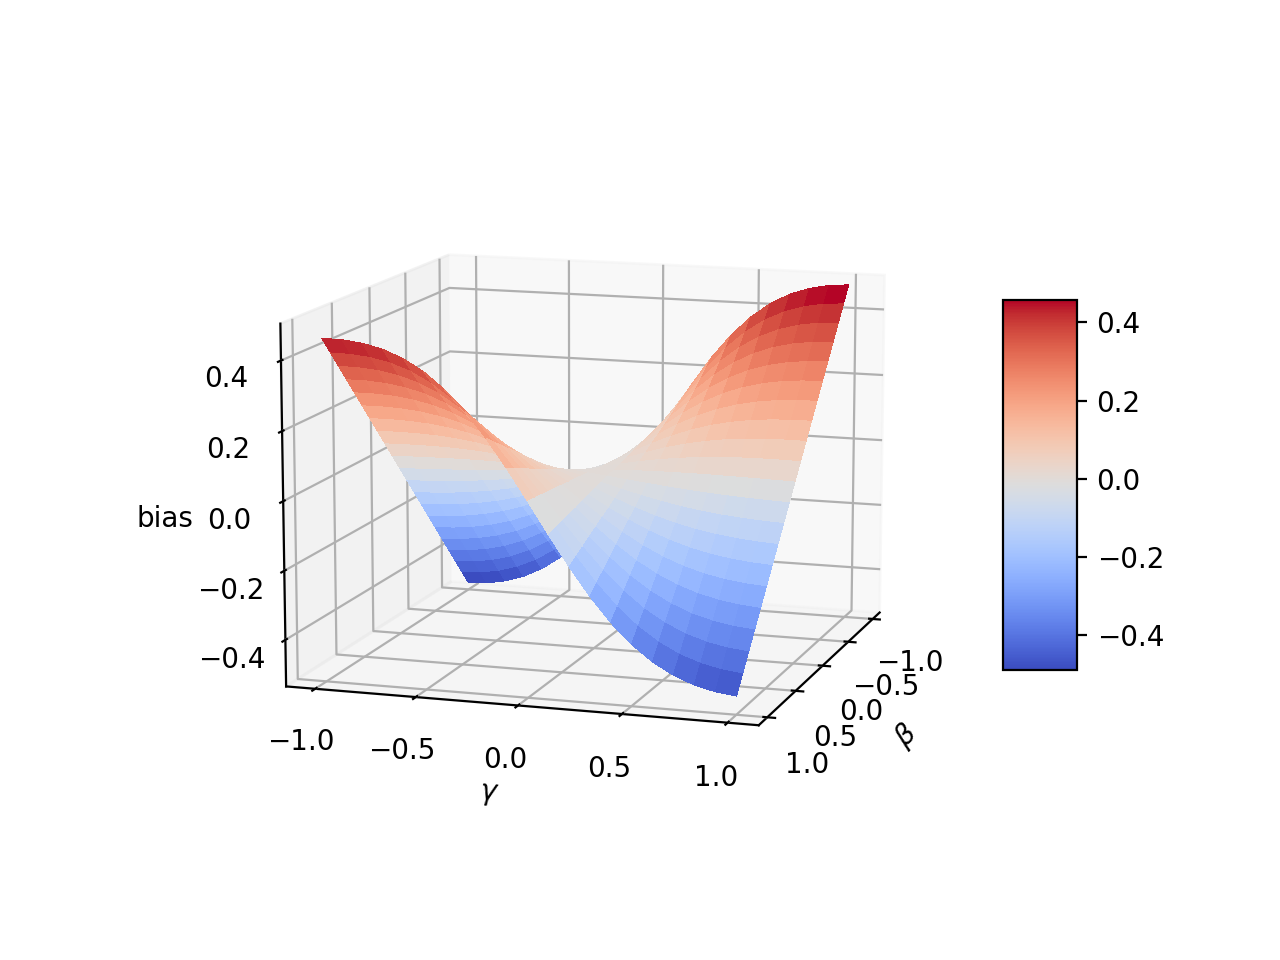

In [19]:
plot3D(generateConf3DPlotData(500))

In [53]:
def generateBiasAlphas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateConfounderBiasLight(1000,i,0.5,0.5,Ux,Uy,Uz))
    return (X,Y)

In [60]:
(aax,ay) = generateBiasAlphas(1000)

In [62]:
ay

[-0.20400835233864684,
 -0.20400835233864692,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.20400835233864684,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.20400835233864684,
 -0.20400835233864692,
 -0.20400835233864692,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.20400835233864692,
 -0.20400835233864692,
 -0.20400835233864686,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.20400835233864684,
 -0.20400835233864686,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.20400835233864692,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.20400835233864692,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.20400835233864684,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.20400835233864695,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.2040083523386469,
 -0.2040083523386469,
 -0.20400835233864686,
 -0.20

<IPython.core.display.Javascript object>


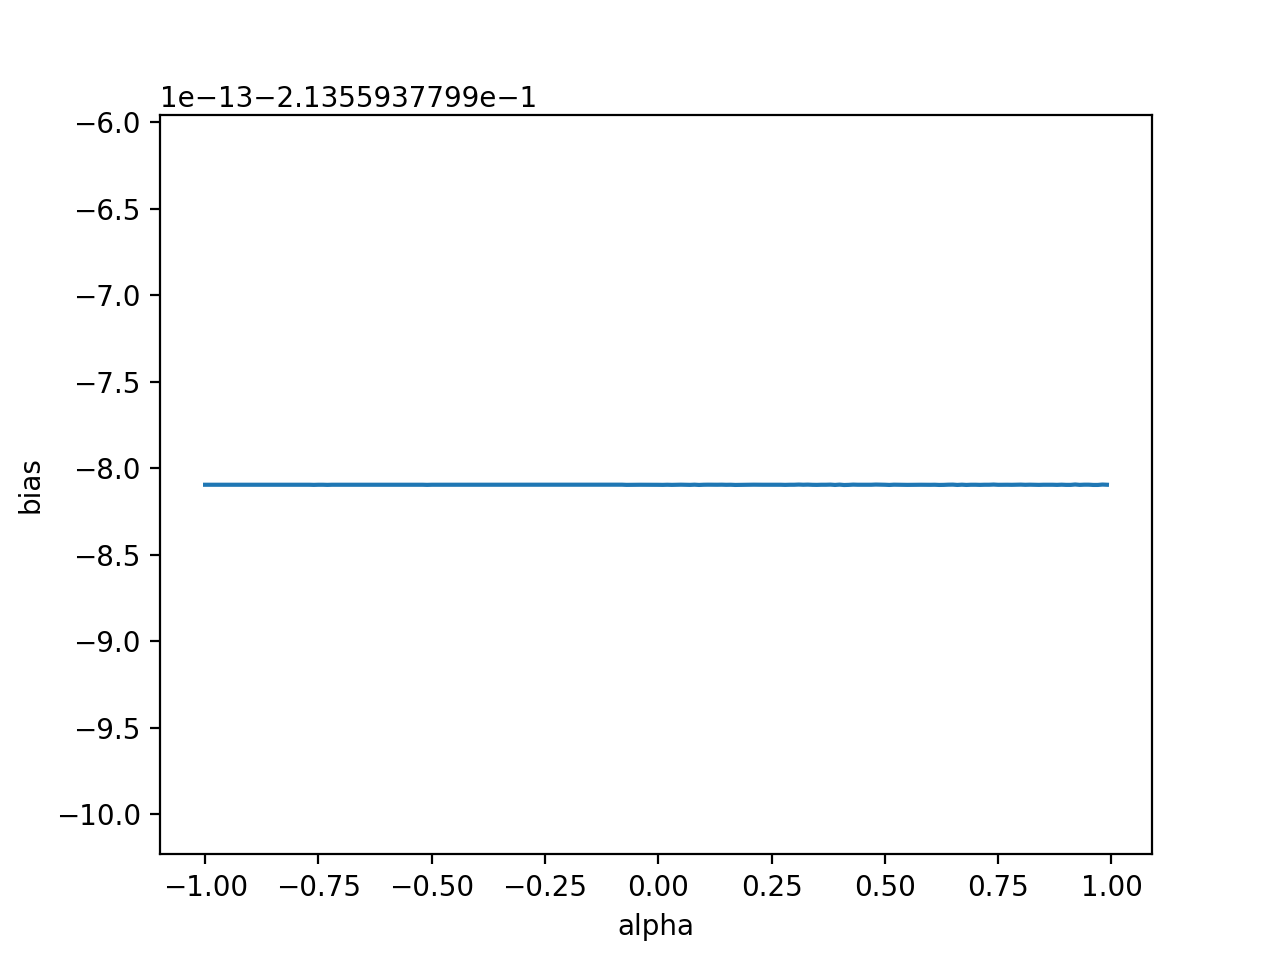

In [59]:
fig, ax = plt.subplots()
ax.plot(aax,ay)

ax.set(xlabel='alpha', ylabel='bias')

plt.show()

In [55]:
def generateBiasBetas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateConfounderBiasLight(1000,0.5,i,0.5,Ux,Uy,Uz))
    return (X,Y)

In [63]:
(bx,by) = generateBiasBetas(1000)

<IPython.core.display.Javascript object>


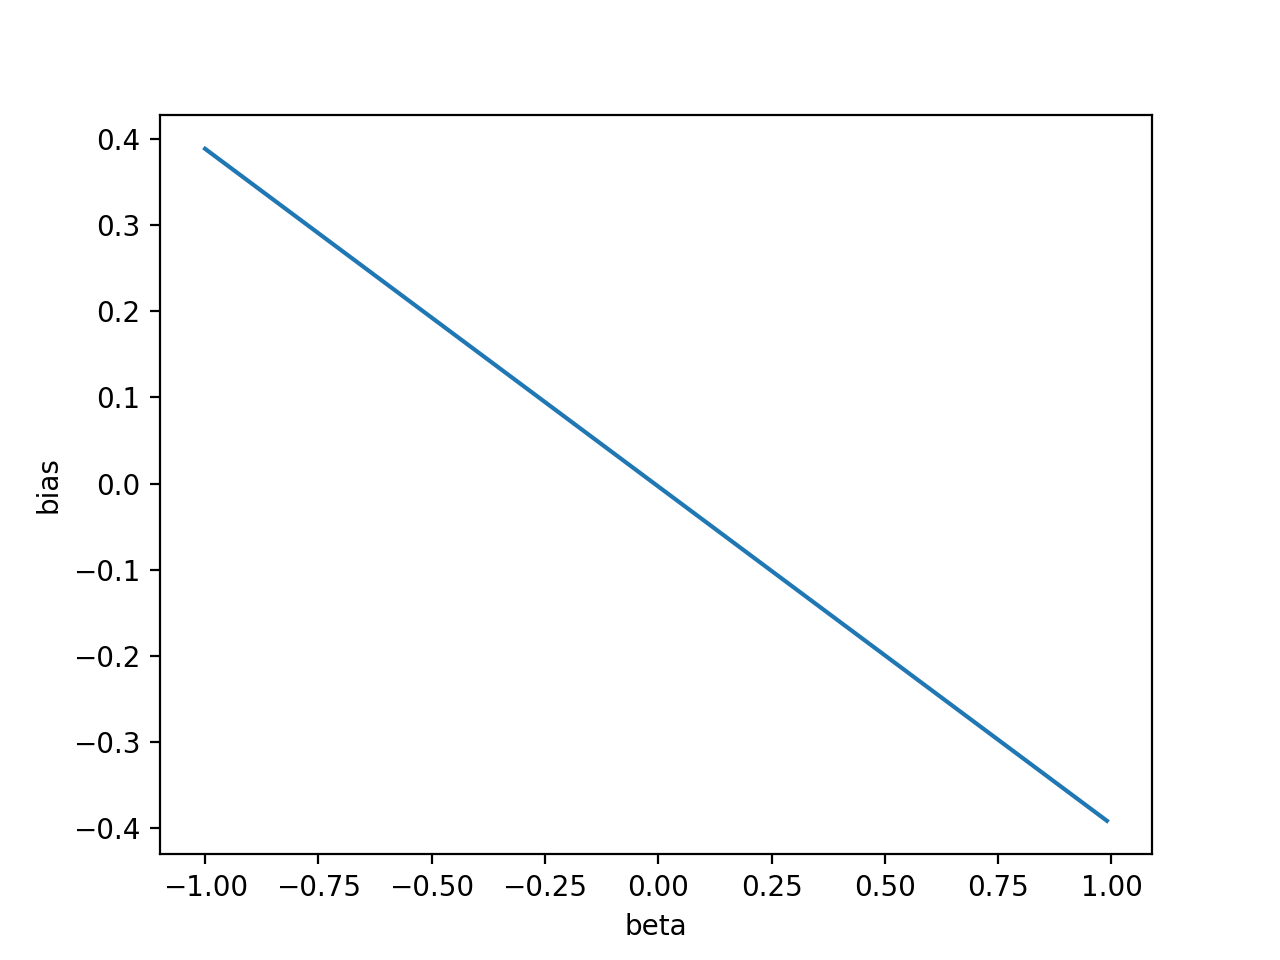

In [64]:
fig, ax = plt.subplots()
ax.plot(bx,by)

ax.set(xlabel='beta', ylabel='bias')

plt.show()

In [57]:
def generateBiasGammas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateConfounderBiasLight(1000,0.5,0.5,i,Ux,Uy,Uz))
    return (X,Y)

In [ ]:
Ua = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
Z = Uz
A = gamma * Z + Ua
Y = alpha * A + beta * Z + Uy

In [65]:
(gx,gy) = generateBiasGammas(1000)

<IPython.core.display.Javascript object>


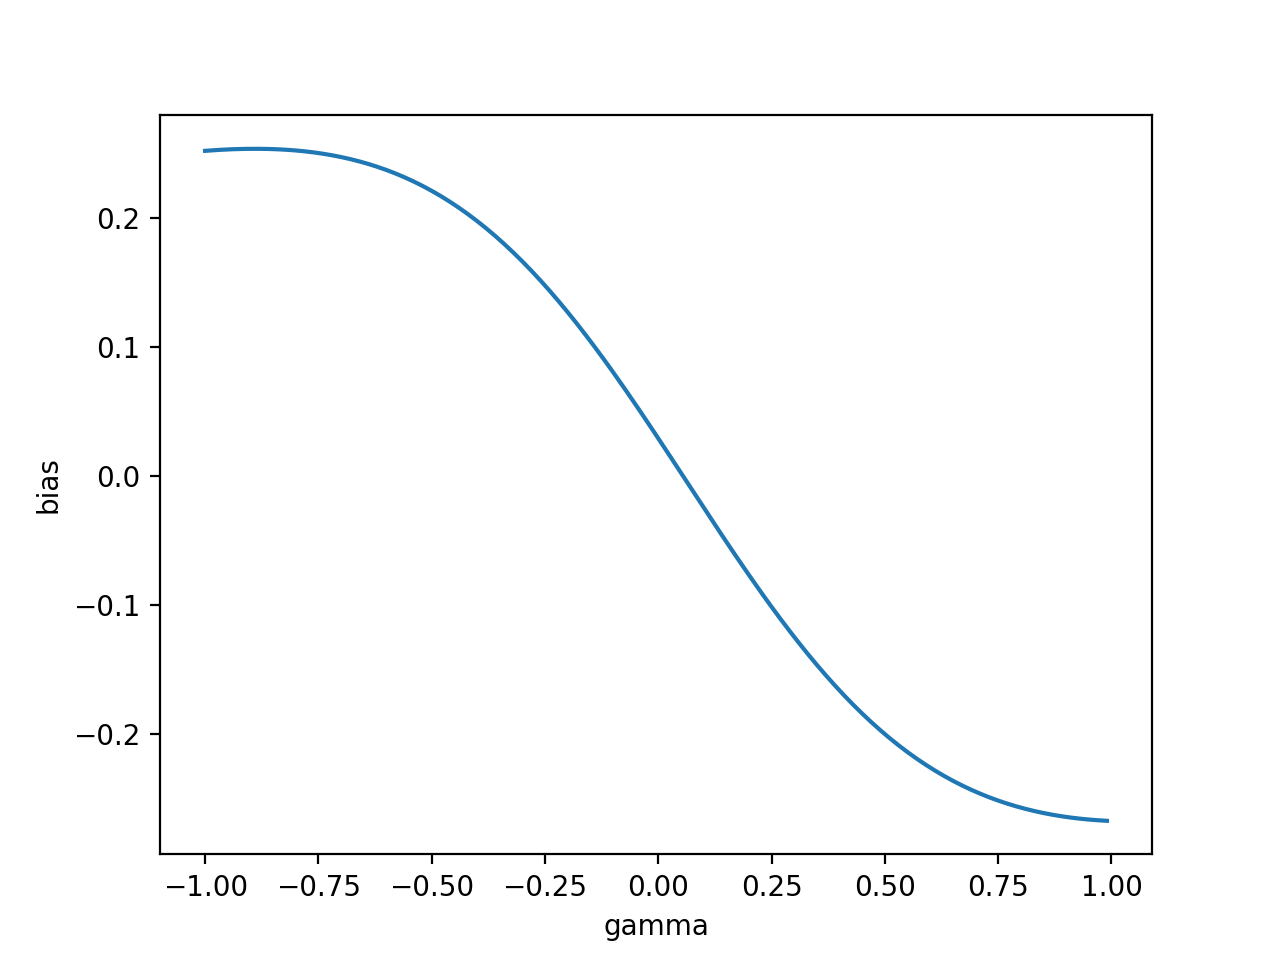

In [66]:
fig, ax = plt.subplots()
ax.plot(gx,gy)

ax.set(xlabel='gamma', ylabel='bias')

plt.show()

<IPython.core.display.Javascript object>


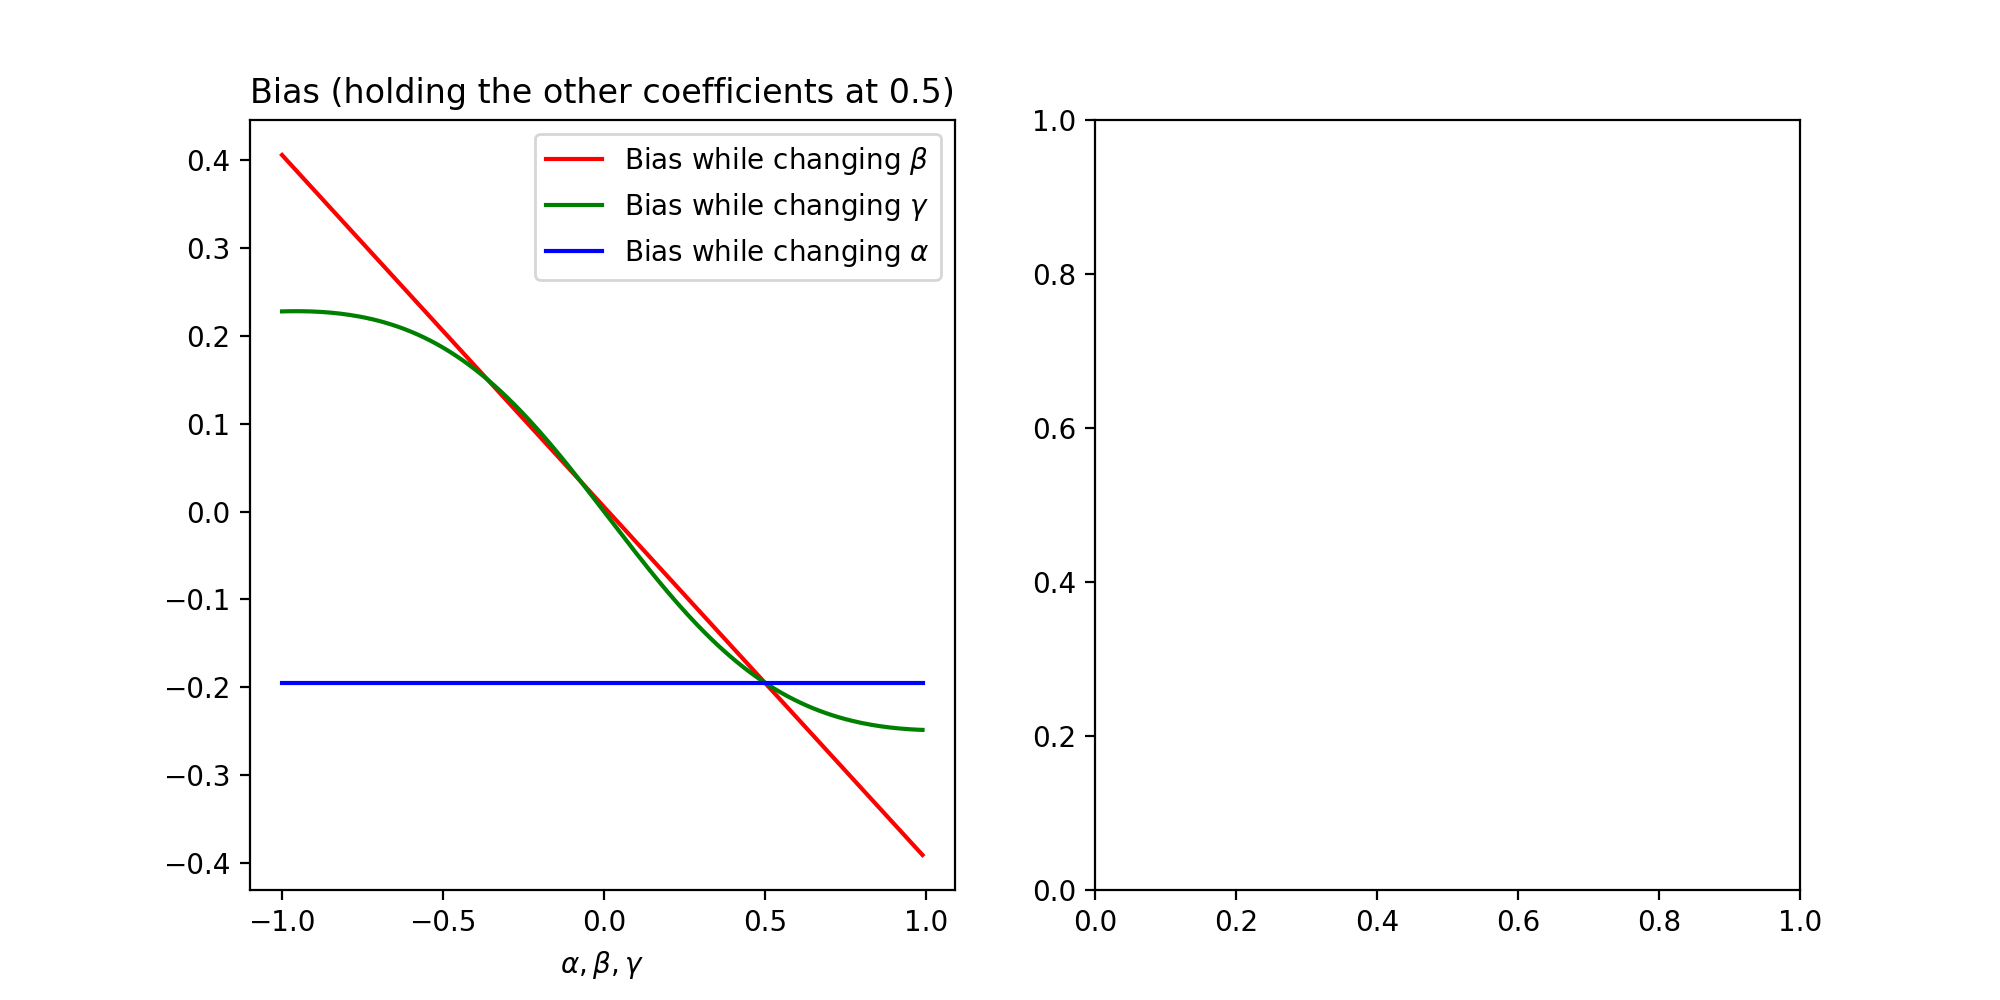

In [33]:
n = 1000
Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
# X = []
# Y = []
# for i in np.arange(-1,1,0.01):
#     X.append(i)
#     Y.append(estimateConfounderBiasLight(1000,0.5,i,0.5,Ux,Uy,Uz))
# return (X,Y)

biasesBetas = {}
biasesGammas = {}
biasesAlphas = {}
values = np.arange(-1,1,0.01)
for i in values:
    biasesBetas[i] = estimateConfounderBiasLight(n,0.5,i,0.5,Ux,Uy,Uz)
    biasesGammas[i] = estimateConfounderBiasLight(n,0.5,0.5,i,Ux,Uy,Uz)
    biasesAlphas[i] = estimateConfounderBiasLight(n,i,0.5,0.5,Ux,Uy,Uz)
    
    


fig,(ax1, ax2) =  plt.subplots(1,2,figsize=(5, 2.5))
#plt.tight_layout()
#ax1.plot(sizes,Mean_SP_Sample1.values())
#ax1.set_ylim(min(Mean_SP_Sample1.values()), max(Mean_SP_Sample1.values()))
#ax1.set_xlim(sizes[0], sizes[-1])

ax1.plot(values,biasesBetas.values(),color = 'r', label = 'Bias while changing ' + r'$\beta$')
ax1.plot(values,biasesGammas.values(),color = 'g', label = 'Bias while changing ' + r'$\gamma$')
ax1.plot(values,biasesAlphas.values(),color = 'b', label = 'Bias while changing ' + r'$\alpha$')
ax1.title.set_text('Bias (holding the other coefficients at 0.5)')
ax1.set_xlabel(r'$\alpha, \beta, \gamma$')
ax1.legend()

In [5]:
def printStats():
    print('Var(Z) = ', st.variance(Z))
    print('Var(X) = ', st.variance(X))
    print('Var(Y) = ', st.variance(Y))
    print('Cov(Z,X) = ', np.cov(Z,X)[0,1])
    print('Cov(Z,Y) = ', np.cov(Z,Y)[0,1])
    print('Cov(X,Y) = ', np.cov(Y,X)[0,1])
    lin_modelXZ = linear_model.LinearRegression()
    lin_modelXZ.fit(Z.reshape(-1,1), X.reshape(-1,1))
    print('Regression coefficient X on Z (gamma)', lin_modelXZ.coef_[0,0], 'Ux = ', lin_modelXZ.intercept_[0]) 
    lin_modelYXZ = linear_model.LinearRegression()
    lin_modelYXZ.fit(np.transpose(np.vstack((X,Z))), Y.reshape(-1,1))
    print('Regression coefficient Y on X and Z: alpha = ', lin_modelYXZ.coef_[0,0], ', beta = ', lin_modelYXZ.coef_[0,1], ', Uy = ', lin_modelYXZ.intercept_)
    print('Corr(Z,X) = ', np.corrcoef(Z,X)[0,1])
    print('Corr(Z,Y) = ', np.corrcoef(Z,Y)[0,1])
    print('Corr(X,Y) = ', np.corrcoef(Y,X)[0,1])

In [35]:
n=100000
alpha = 0.5
beta = -1
gamma = -1
Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])

Z = Uz
X = gamma * Z + Ux
Y = alpha * X + beta * Z + Uy

In [36]:
printStats()

Var(Z) =  0.9981427654057107
Var(X) =  2.010860050746972
Var(Y) =  3.5124237485163676
Cov(Z,X) =  -1.003955243495165
Cov(Z,Y) =  -1.5046595089155086
Cov(X,Y) =  2.014338054097753
Regression coefficient X on Z (gamma) -1.005823293311246 Ux =  -0.004025267223209969
Regression coefficient Y on X and Z: alpha =  0.5003868213862521 , beta =  -1.0041584937015524 , Uy =  [0.00188373]
Corr(Z,X) =  -0.7086423408817788
Corr(Z,Y) =  -0.8035972649607797
Corr(X,Y) =  0.7579455051530194


In [43]:
def estimateBias(n, alpha, beta, gamma):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])

    Z = Uz
    X = beta * Z + Ux
    Y = alpha * X + gamma * Z + Uy
    
    VarZ = st.variance(Z)
    VarX = st.variance(X)
    VarY = st.variance(Y)
    CovXZ = CovZX = np.cov(Z,X)[0,1]
    CovZY = CovYZ = np.cov(Z,Y)[0,1]
    CovXY = CovYX = np.cov(Y,X)[0,1]
    
    selBias = (CovZX * (((CovYX/VarX)*CovXZ) - CovYZ)) / ((VarX * VarZ) - (CovXZ * CovXZ))
    return selBias

In [46]:
estimateBias(10000,0.5,-1,-1)

2.5035398996993266

In [49]:
alpha = 0.5
beta = -1
gamma = -1

Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])    
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])

Z = Uz
X = beta * Z + Ux
Y = alpha * X + gamma * Z + Uy
    
VarZ = st.variance(Z)
VarX = st.variance(X)
VarY = st.variance(Y)
CovXZ = CovZX = np.cov(Z,X)[0,1]
CovZY = CovYZ = np.cov(Z,Y)[0,1]
CovXY = CovYX = np.cov(Y,X)[0,1]
    
Bias = (CovZX * ( ((CovYX/VarX)*CovXZ) - CovYZ) ) / ((VarX * VarZ) - (CovXZ * CovXZ))
print('Bias = ', Bias)

Bias =  -0.504893800854267


In [48]:
printStats()

Var(Z) =  0.9956249377438122
Var(X) =  2.0059105893323963
Var(Y) =  3.4987169769204445
Cov(Z,X) =  -0.9963421399208301
Cov(Z,Y) =  -1.4950297796180145
Cov(X,Y) =  2.002358788145205
Regression coefficient X on Z (gamma) -1.0007203537696079 Ux =  0.0008655308093863633
Regression coefficient Y on X and Z: alpha =  0.5018106671648774 , beta =  -0.999427221976541 , Uy =  [4.88721594e-05]
Corr(Z,X) =  -0.705025508575277
Corr(Z,Y) =  -0.8010277365674505
Corr(X,Y) =  0.7558431934382532
